<a href="https://colab.research.google.com/github/uscudum/ML-AS-Classification-KNN-Breast-Cancer/blob/main/Clustering_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el dataset
df = pd.read_csv('Mall_Customers.csv')

In [4]:
# Visualizar las primeras filas del dataset
print(df.head())

# Verificar si hay valores nulos
print(df.isnull().sum())

# Análisis de las variables (descripción general)
print(df.describe())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000  

In [6]:
# Selección de variables para el análisis (excluyendo 'CustomerID' y 'Gender')
X = df.drop(columns=['CustomerID', 'Genre'])
print(X.head())

# Escalado de los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Creación del modelo KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_std)

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [8]:
# Añadir los resultados del clustering al DataFrame
df['cluster'] = kmeans.labels_

# Visualizar y analizar coincidencias en las primeras filas
print(df[['CustomerID', 'Genre', 'cluster']].head(60))

    CustomerID   Genre  cluster
0            1    Male        0
1            2    Male        0
2            3  Female        0
3            4  Female        0
4            5  Female        0
5            6  Female        0
6            7  Female        0
7            8  Female        0
8            9    Male        2
9           10  Female        0
10          11    Male        2
11          12  Female        0
12          13  Female        2
13          14  Female        0
14          15    Male        0
15          16    Male        0
16          17  Female        0
17          18    Male        0
18          19    Male        2
19          20  Female        0
20          21    Male        0
21          22    Male        0
22          23  Female        2
23          24    Male        0
24          25  Female        2
25          26    Male        0
26          27  Female        2
27          28    Male        0
28          29  Female        0
29          30  Female        0
30      

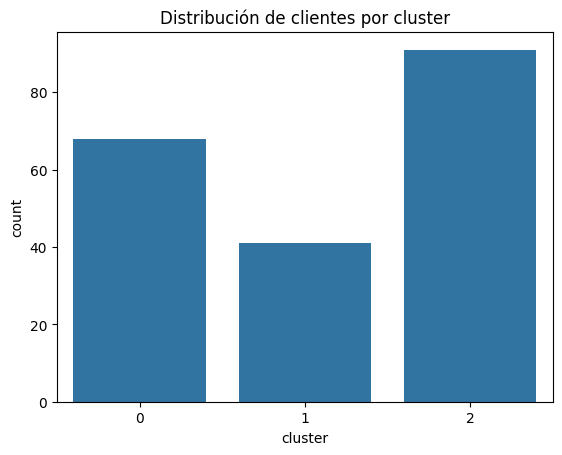

In [9]:
# Visualizar la distribución de los clusters
sns.countplot(x='cluster', data=df)
plt.title('Distribución de clientes por cluster')
plt.show()

In [10]:
# Filtro para observar a los clientes en el cluster 0 (por ejemplo)
print(df[df['cluster'] == 0])

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
134         135    Male   20                  73                       5   
138         139    Male   19                  74                      10   
142         143  Female   28                  76                      40   
144         145    Male   25                  77                      12   
162         163    Male   19                  81                       5   

     cluster  
0          0  
1          0  
2          0  
3          0  
4          0

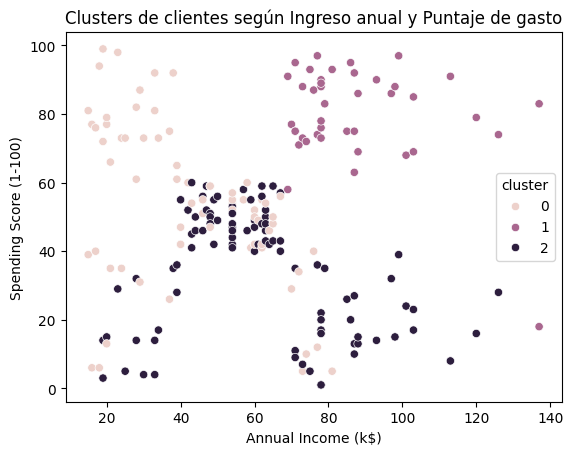

In [16]:
# Visualización de la relación entre 'Age', 'Annual Income (k$)', y 'Spending Score (1-100)'
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster')
plt.title('Clusters de clientes según Ingreso anual y Puntaje de gasto')
plt.show()